<a href="https://colab.research.google.com/github/aacharlotte/MPI-Status-Prediction-Project/blob/main/Poverty_pj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Multidimensional Poverty Index (MPI) Status Prediction Project**

**Predicting Household Poverty Using Machine Learning:** Evidence from Uganda National Household Survey (2019/20)

A comprehensive analysis leveraging advanced machine learning techniques
to identify and predict poverty patterns across Ugandan households,
providing actionable insights for targeted policy interventions.


**Group 8 members**
1. Achan Kevin Linnet (Neural network, Slides)
2. Aharimpisya Daphine (EDA + visualisations)
3. Ategeka Amanda Theresa (EDA, Classical ML models, GitHub)
4. Charlotte Arinaitwe (ML models, Neural network,GitHub)
5. Mirembe Pricey Samantha (EDA, Slides)
6. Racheal Nyakato (EDA visualisations + interpretation, Slides)

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from functools import reduce

import glob

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score

import joblib

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""
file = "/content/drive/MyDrive/person-level/NNindividual.dta"

df = pd.read_stata(file)
df
"""

'\nfile = "/content/drive/MyDrive/person-level/NNindividual.dta"\n\ndf = pd.read_stata(file)\ndf\n'

###How merging was done and stata(.dta) data saved as csv

In [ ]:
"""
#person-level files
person_files = glob.glob("/content/drive/MyDrive/person-level/*.dta")
dfs_person = [pd.read_stata(f) for f in person_files]

#household-level files
household_files = glob.glob("/content/drive/MyDrive/household-level/*.dta")
dfs_household = [pd.read_stata(f) for f in household_files]
"""

'\n#person-level files\nperson_files = glob.glob("/content/drive/MyDrive/person-level/*.dta")\ndfs_person = [pd.read_stata(f) for f in person_files]\n\n#household-level files\nhousehold_files = glob.glob("/content/drive/MyDrive/household-level/*.dta")\ndfs_household = [pd.read_stata(f) for f in household_files]\n'

In [ ]:
"""
#outer merge person-level on hhid + pid
merged_person = reduce (
    lambda a, b: pd.merge(a, b, on=["hhid", "pid"], how="outer"),
    dfs_person
)

#left merge household-level on hhid
merged = reduce (
    lambda a, b: pd.merge(a, b, on="hhid", how="left"),
    [merged_person] + dfs_household
)

merged
"""

'\n#outer merge person-level on hhid + pid\nmerged_person = reduce (\n    lambda a, b: pd.merge(a, b, on=["hhid", "pid"], how="outer"),\n    dfs_person\n)\n\n#left merge household-level on hhid\nmerged = reduce (\n    lambda a, b: pd.merge(a, b, on="hhid", how="left"),\n    [merged_person] + dfs_household\n)\n\nmerged\n'

In [ ]:
"""
#save merged stata dataset as csv
merged.to_csv("NNpovdata_merged2.csv", index=False)
"""

'\n#save merged stata dataset as csv\nmerged.to_csv("NNpovdata_merged2.csv", index=False)\n'

In [ ]:
file = "/content/drive/MyDrive/NNpovdata_merged2.csv"

df = pd.read_csv(file)
df

/tmp/ipython-input-255469680.py:3: DtypeWarning: Columns (15,21,71,73,78,114,115,141,145,148,150,152,154,163,167,194,207,210,212) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


,hhid,pid,E00,E02,E03,E04,E04b,E04_1,E05,E06,...,HA0319,HA0320,HA0321,HA0322,HA0323,HA0331,HA0332,HA0399,HA03211,interview__key
0,100001,1,1.0,Unable to read and write,Never attended,Disabled,NaN,No,NaN,NaN,...,No,No,No,No,No,No,"Yes,jointly with hh member",No,"Yes,jointly with hh member",86-59-37-56
1,100001,2,1.0,Unable to read and write,Never attended,Disabled,NaN,No,NaN,NaN,...,No,No,No,No,No,No,"Yes,jointly with hh member",No,"Yes,jointly with hh member",86-59-37-56
2,100001,3,1.0,Unable to read and write,Never attended,Had to help at home,NaN,No,NaN,NaN,...,No,No,No,No,No,No,"Yes,jointly with hh member",No,"Yes,jointly with hh member",86-59-37-56
3,100002,1,1.0,Able to read and write,Attended school in the past,NaN,NaN,NaN,Completed P.7,2014.0,...,No,No,No,No,No,No,"Yes,individually",No,No,58-43-23-89
4,100002,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,"Yes,individually",No,No,58-43-23-89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65072,99904,1,1.0,Unable to read and write,Attended school in the past,NaN,NaN,NaN,Completed P.3,NaN,...,No,No,No,No,No,No,No,No,No,41-17-33-64
65073,99904,2,2.0,Unable to read and write,Never attended,Had to help at home,NaN,No,NaN,NaN,...,No,No,No,No,No,No,No,No,No,41-17-33-64
65074,99904,4,2.0,Unable to read and write,Never attended,Too expensive,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,No,41-17-33-64
65075,99904,5,1.0,Unable to read and write,Never attended,Too expensive,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,No,41-17-33-64


## **Data Exploration and Cleaning**

**Handling duplicates**

In [ ]:
# check duplicates
print('duplicated rows', df.duplicated().sum())

duplicated rows 28


In [ ]:
#duplicated rows
df[df.duplicated()]

,hhid,pid,E00,E02,E03,E04,E04b,E04_1,E05,E06,...,HA0319,HA0320,HA0321,HA0322,HA0323,HA0331,HA0332,HA0399,HA03211,interview__key
3674,11105,1,1.0,Able to read and write,Attended school in the past,NaN,NaN,NaN,Completed P.4,NaN,...,No,NaN,No,NaN,NaN,NaN,NaN,No,NaN,71-81-87-06
3675,11105,1,1.0,Able to read and write,Attended school in the past,NaN,NaN,NaN,Completed P.4,NaN,...,NaN,No,NaN,No,No,"Yes,individually",No,NaN,No,49-50-15-07
3678,11105,1,1.0,Able to read and write,Attended school in the past,NaN,NaN,NaN,Completed post primary/junior specialized trai...,NaN,...,No,NaN,No,NaN,NaN,NaN,NaN,No,NaN,71-81-87-06
3679,11105,1,1.0,Able to read and write,Attended school in the past,NaN,NaN,NaN,Completed post primary/junior specialized trai...,NaN,...,NaN,No,NaN,No,No,"Yes,individually",No,NaN,No,49-50-15-07
3682,11105,2,1.0,Able to read and write,Currently attending school,NaN,NaN,NaN,NaN,NaN,...,No,NaN,No,NaN,NaN,NaN,NaN,No,NaN,71-81-87-06
3683,11105,2,1.0,Able to read and write,Currently attending school,NaN,NaN,NaN,NaN,NaN,...,NaN,No,NaN,No,No,"Yes,individually",No,NaN,No,49-50-15-07
3686,11105,2,1.0,Able to read and write,Currently attending school,NaN,NaN,NaN,NaN,NaN,...,No,NaN,No,NaN,NaN,NaN,NaN,No,NaN,71-81-87-06
3687,11105,2,1.0,Able to read and write,Currently attending school,NaN,NaN,NaN,NaN,NaN,...,NaN,No,NaN,No,No,"Yes,individually",No,NaN,No,49-50-15-07
3690,11105,3,1.0,Able to read and write,Currently attending school,NaN,NaN,NaN,NaN,NaN,...,No,NaN,No,NaN,NaN,NaN,NaN,No,NaN,71-81-87-06
3691,11105,3,1.0,Able to read and write,Currently attending school,NaN,NaN,NaN,NaN,NaN,...,NaN,No,NaN,No,No,"Yes,individually",No,NaN,No,49-50-15-07


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# Confirm that there are no duplicates left
df.duplicated().sum()

np.int64(0)

In [13]:
# View missing values in hhid pid rows. Null values in our ID columns would raise serious concerns about data integrity
print(df["hhid"].isnull().sum())
print(df["pid"].isnull().sum())
print(df["M0"].isnull().sum())


0
0
49364


In [14]:
print(df.columns.tolist())

['hhid', 'pid', 'E00', 'E02', 'E03', 'E04', 'E04b', 'E04_1', 'E05', 'E06', 'E09', 'E09b', 'E10', 'E12', 'E13', 'E13b', 'E14', 'E14_1', 'E15', 'E16', 'E17', 'E17_oth', 'E20j', 'E20h', 'E20i', 'E20b', 'E20c', 'E20d', 'E20e', 'E20k', 'E20f', 'E20f_1', 'E20g', 'HE00', 'HE22', 'HE23', 'HE23_1', 'HE24', 'HE02', 'HE03', 'HE04', 'HE05', 'HE06__1', 'HE06__2', 'HE06__3', 'HE06__4', 'HE06__5', 'HE06__6', 'HE06__7', 'HE06__8', 'HE06__9', 'HE06__10', 'HE06__11', 'HE06__12', 'HE06__13', 'HE06__14', 'HE06__15', 'HE06__16', 'HE06__17', 'HE06__20', 'HE06__21', 'HE06__22', 'HE06__23', 'HE06__24', 'HE06__25', 'HE06__26', 'HE06__27', 'HE06__96', 'HE06b', 'HE07', 'HE08', 'HE08b', 'HE09', 'HE09b', 'HE34', 'HE35', 'HE10', 'HE25', 'HE25b', 'HE11', 'HE36', 'HE37', 'HE37_oth', 'HE14', 'HE15', 'HE16', 'HE17a', 'HE17b', 'HE17c', 'HE17d', 'HE17e', 'HE17f', 'HE17f_1', 'HE17g', 'HE18', 'HE38', 'HE39a', 'HE39b', 'HE39c', 'HE39d', 'HE39e', 'HE39f', 'HE39g', 'HE39h', 'HE19', 'HE29__1', 'HE29__2', 'HE29__3', 'HE29__4', 

In [15]:
df["HHhead"].unique()

array([ 1.,  0., nan])

In [16]:
# Look for the missing values in our target
df["M0"]


,M0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
65072,0.466221
65073,0.466221
65074,0.466221
65075,0.466221



**NOTE:** Missing values in target - M0 - is not an issue. While Calculating MPI, all non-poor data is censored so individulas/households with
the M0 value here are poor while those with a NaN are non-poor becouse the MPI data is merged with the original dataset for prediction

In [17]:
#Target variable - replacing missing values with 0 and those with M0 value with 1.Therefore, poor populate as 1, non-poor as 0
df["M0"] = df["M0"].notnull().astype(int)

In [18]:
# Confirm that there are no more Nan values in M0
print(df["M0"].isnull().sum())

0


In [19]:
# High level overview of our new dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65049 entries, 0 to 65076
Columns: 244 entries, hhid to interview__key
dtypes: float64(115), int64(4), object(125)
memory usage: 121.6+ MB


## **Feature Selection**

In [20]:
# Keep only relevant features
df = df[["M0","E05", "age", "E03", "HE02", "HE07", "HE09", "HE11", "HC07", "HC08a", "HC14", "HC15", "hsize", "HC03", "HC18", "HC04", "HC05", "HC06", "HA0316", "HA0318", "HA0317", "HA0320", "HA039", "HA0311", "HA038", "Working", "employment", "wage_st", "access_financial_account_any", "digital_reg_financial", "HHhead"]]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65049 entries, 0 to 65076
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   M0                            65049 non-null  int64  
 1   E05                           23891 non-null  object 
 2   age                           64751 non-null  float64
 3   E03                           59030 non-null  object 
 4   HE02                          64985 non-null  object 
 5   HE07                          12612 non-null  object 
 6   HE09                          10764 non-null  object 
 7   HE11                          10764 non-null  object 
 8   HC07                          64908 non-null  object 
 9   HC08a                         58064 non-null  float64
 10  HC14                          64918 non-null  object 
 11  HC15                          58557 non-null  object 
 12  hsize                         64751 non-null  float64
 13  HC03  

**Handling null values**

In [22]:
# Check for null values
df.isnull().sum()

,0
M0,0
E05,41158
age,298
E03,6019
HE02,64
HE07,52437
HE09,54285
HE11,54285
HC07,141
HC08a,6985


In [23]:
df["M0"].value_counts()

,count
M0,
0,49364
1,15685


In [24]:
df

,M0,E05,age,E03,HE02,HE07,HE09,HE11,HC07,HC08a,...,HA0320,HA039,HA0311,HA038,Working,employment,wage_st,access_financial_account_any,digital_reg_financial,HHhead
0,0,NaN,55.0,Never attended,No,NaN,NaN,NaN,Other (specify),30.0,...,No,No,No,No,Working,1.0,nonfarm self employment,0.0,0.0,1.0
1,0,NaN,52.0,Never attended,No,NaN,NaN,NaN,Other (specify),30.0,...,No,No,No,No,Working,1.0,nonfarm self employment,0.0,0.0,0.0
2,0,NaN,18.0,Never attended,No,NaN,NaN,NaN,Other (specify),30.0,...,No,No,No,No,Not working,0.0,NaN,0.0,0.0,0.0
3,0,Completed P.7,24.0,Attended school in the past,No,NaN,NaN,NaN,Other (specify),120.0,...,No,No,No,No,Working,1.0,nonfarm wage employment,0.0,0.0,1.0
4,0,NaN,2.0,NaN,No,NaN,NaN,NaN,Other (specify),120.0,...,No,No,No,No,Missing,0.0,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65072,1,Completed P.3,47.0,Attended school in the past,No,NaN,NaN,NaN,Public taps,4.0,...,No,No,No,No,Working,1.0,nonfarm self employment,0.0,0.0,1.0
65073,1,NaN,46.0,Never attended,Yes,Yes,Pharmacy/Drug shop,0 to &lt;3kms,Public taps,4.0,...,No,No,No,No,Not working,0.0,NaN,0.0,0.0,0.0
65074,1,NaN,10.0,Never attended,No,NaN,NaN,NaN,Public taps,4.0,...,No,No,No,No,Not working,0.0,NaN,0.0,0.0,0.0
65075,1,NaN,6.0,Never attended,No,NaN,NaN,NaN,Public taps,4.0,...,No,No,No,No,Not working,0.0,NaN,0.0,0.0,0.0


In [25]:
df["Working"].unique()

array(['Working', 'Not working', 'Missing', nan], dtype=object)

# **Data Visualisation and Interpretation**

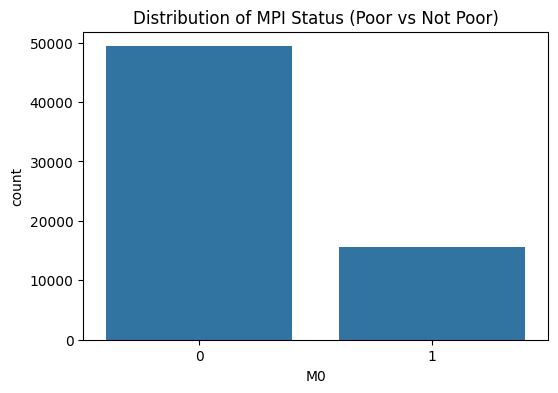

In [26]:
#Univariate analysis 1 - Distribution of Target variable (MPI Status)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='M0')
plt.title('Distribution of MPI Status (Poor vs Not Poor)')
plt.show()

Interpretation: The chart shows the frequency distribution of the Multidimensional Poverty Index (MPI). As seen, there is a class imbalance (3:1) - almost 50000 are not Poor compared to ~15000 Poor. The imbalance could bias the model towards predicting "Not Poor" more often. As such we will apply stratified sampling during train/test split to preserve the same proportion of classes in training and testing sets.

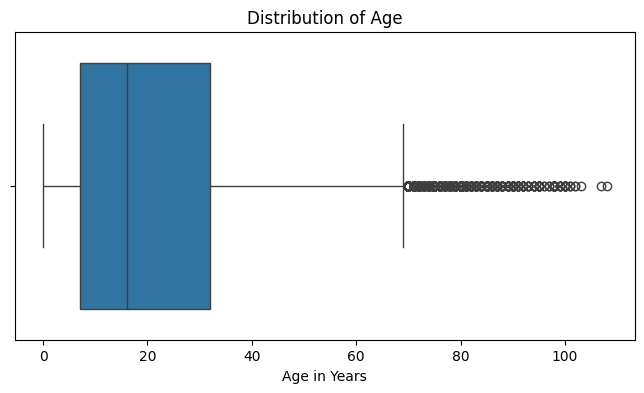

In [ ]:
#Univariate analysis 2 - Box plot for age
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='age')
plt.title('Distribution of Age')
plt.xlabel('Age in Years')
plt.show()

Interpretation: Most people in the dataset are quite young (between 5 and 35 years) , with a median age around 17. A few older individuals above 70 present as outliers. This implies a big proportion of the population is school-aged or starting to work. As such, features that reflect  youth-focused deprivations like school attendance and highest grade completed are likely to be important for predicting MPI status.

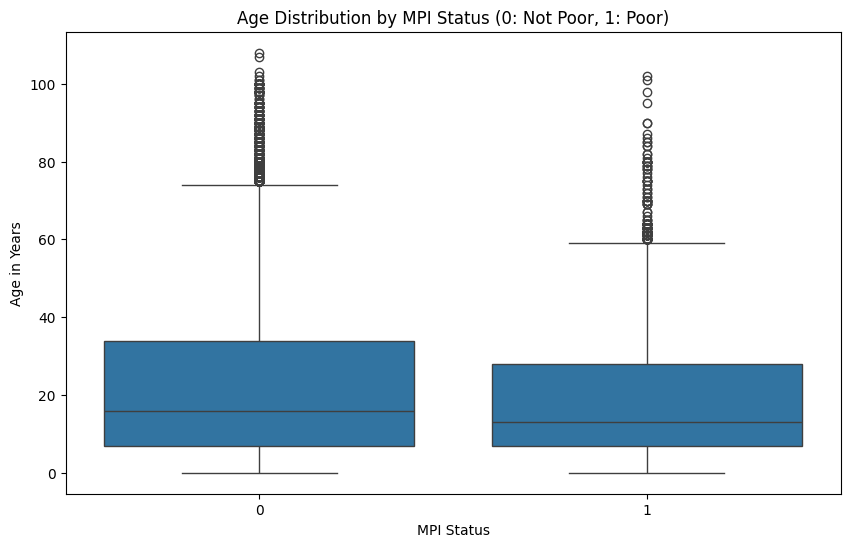

In [27]:
# Multivariate analysis 1 - Age distribution by MPI Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='M0', y='age')
plt.title('Age Distribution by MPI Status (0: Not Poor, 1: Poor)')
plt.xlabel('MPI Status')
plt.ylabel('Age in Years')
plt.show()

Interpretation: Each box shows the distribution of age per MPI status group (Poor- 1 or Not Poor -0). Median for poor group lower than that of non-poor group. The interquatile range is narrower for the poor group and concentrated in the young age bracket of 5 to 25, with the upper age limit rarely exceeding 6o years. This shows that poverty is more common among children and youth. It implies that youth-focused deprivations could be key poverty drivers in this context. As such, variables related to educaton and school attendance are strong MPI status predictors.

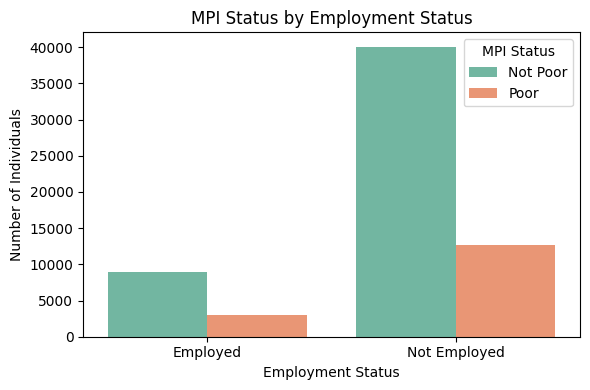

In [ ]:
#Multivariate analysis 2 - MPI Status by employment status
plt.figure(figsize=(6, 4))
sns.countplot(
    data=df,
    x=df['employment'].map({1: 'Employed', 0: 'Not Employed'}),
    hue=df['M0'].map({1: 'Poor', 0: 'Not Poor'}),
    palette='Set2'
)

plt.title("MPI Status by Employment Status")
plt.xlabel("Employment Status")
plt.ylabel("Number of Individuals")
plt.legend(title="MPI Status")
plt.tight_layout()
plt.show()

Interpretation: Looking at the two categories, there is a higher number of poor people in the unemployed category (~12500) vs ~2500 in the employed category. This suggests being employed generally reduces the risk of multidimensional poverty. However, the fact that many unemployed individuals are also not poor suggests that they may have some other means of support or income.In conclusion, employment status is a key factor for predicting poverty, but combining it with other variables will improve the accuracy of the model.

# **Data Preprocessing**
## **Train-Test Split**

In [28]:

X = df.drop("M0", axis=1)  #
y = df["M0"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Get the list of numeric column names
int_col=X_train.select_dtypes('integer').columns
print(int_col)

float_col = X_train.select_dtypes('float').columns
print(float_col)
#with the 'number' value we are returning all numeric columns- integer columns and float
num_cols=X_train.select_dtypes('number').columns
num_cols

Index([], dtype='object')
Index(['age', 'HC08a', 'hsize', 'HC03', 'employment',
       'access_financial_account_any', 'digital_reg_financial', 'HHhead'],
      dtype='object')


Index(['age', 'HC08a', 'hsize', 'HC03', 'employment',
       'access_financial_account_any', 'digital_reg_financial', 'HHhead'],
      dtype='object')

In [29]:
# Get the list of string column names
cat_cols= X_train.select_dtypes('object').columns
cat_cols

Index(['E05', 'E03', 'HE02', 'HE07', 'HE09', 'HE11', 'HC07', 'HC14', 'HC15',
       'HC18', 'HC04', 'HC05', 'HC06', 'HA0316', 'HA0318', 'HA0317', 'HA0320',
       'HA039', 'HA0311', 'HA038', 'Working', 'wage_st'],
      dtype='object')

In [30]:
#Detect skewness on numeric train only
skewness = X_train[num_cols].skew().abs()  # absolute skew
skew_threshold = 0.75  # common rule-of-thumb

num_median_cols = skewness[skewness > skew_threshold].index.tolist()   # skewed -> median
num_mean_cols   = skewness[skewness <= skew_threshold].index.tolist()  # approx normal -> mean

print("Mean-impute numeric cols:", num_mean_cols)
print("Median-impute numeric cols:", num_median_cols)

Mean-impute numeric cols: []
Median-impute numeric cols: ['age', 'HC08a', 'hsize', 'HC03', 'employment', 'access_financial_account_any', 'digital_reg_financial', 'HHhead']


In [31]:
# column splits
median_cols = ['age', 'HC08a', 'hsize', 'HC03', 'employment', 'access_financial_account_any', 'digital_reg_financial', 'HHhead']  # numeric (median impute)

# Transformers
median_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy="constant", fill_value="MISSING")),
    ('encoder', OneHotEncoder(handle_unknown="ignore"))
])

# Preprocessor
preprocessor = ColumnTransformer([
    ('median_num', median_transformer, median_cols),
    ('cat', cat_transformer, cat_cols)
])

# Save preprocessor
joblib.dump(preprocessor, "preprocessor.pkl")

['preprocessor.pkl']

# **Model 1: Logistic Regression**
Logistic regression is a supervised machine learning technique used for classification problems. It is often used as a starting point to establish a baseline before moving to more complex model types.

Logistic regression uses a **sigmoid function** to predict the probability that an input belongs to a specific class. It is often used for binary classification where the output can be one of two possible categories such as Yes/No, True/False or 0/1. The sigmoid function converts inputs into a probability value between 0 and 1.

**Why would a logistic regression model be suitable to our dataset?**
1. It is a great baseline model to assess if the more complex ones are adding value.
2. Logreg models do well with a large sample size like we have.
3. We aim to perform binary classification and this technique is excellent for that.
4. Computational efficiency. It can process large datasets and maintain a good training and prediction speed.

**Why might this model not be highly suited?**

1. We have outliers in the dataset and logreg models are affected by those.

**Baseline Logistic Regression Model**

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      9873
           1       0.61      0.29      0.40      3137

    accuracy                           0.78     13010
   macro avg       0.71      0.62      0.63     13010
weighted avg       0.76      0.78      0.76     13010



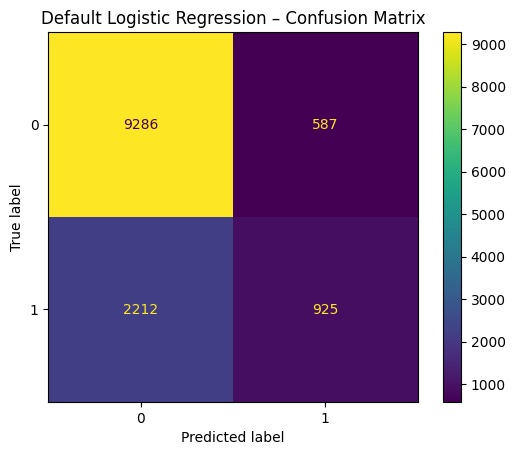

In [32]:
# Default Logistic Regression pipeline
lr_baseline = Pipeline([
    ('pre', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

lr_baseline.fit(X_train, y_train)
y_pred_base = lr_baseline.predict(X_test)

print(classification_report(y_test, y_pred_base))
ConfusionMatrixDisplay.from_estimator(lr_baseline, X_test, y_test)
plt.title('Default Logistic Regression – Confusion Matrix')
plt.show()

# **Performance of our baseline logistic regression model**

**Accuracy** (**0.78**): Decently accurate but could be much better. 22% is too high of an error margin.

**Recall** **vs. Precision**: As we can see on a class level, the model overall has very low precision and recall for the positive class (poor) compared to the other (not poor) likely due to the class imbalance.
On a macro level, the model is better at correctly identifying the positive classes amongst those it predicts to be poor (precision **0.71**) than it is at finding all the positive instances (recall **0.61**) This suggests it is making conservative predictions; it only predicts a class if it's very sure, but in doing so, it misses many true cases.

The low recall would have serious implications on our social impact efforts as many deserving individuals would not be identified by the model.

**F1-Score** (**0.61**): Low


# **Model 2: Logistic Regression Model with GridSearchCV Hyperparameter Tuning**

**GridSearchCV** is a technique used to systematically search for the best combination of hyperparameters for a model. It works by training and evaluating the model for every possible combination of specified hyperparameter values using cross-validation. The best combination is selected based on a chosen scoring metric. The recall_macro scoring metric calculates recall for each class and averages them, treating all classes equally regardless of their support.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'model__C': 1, 'model__class_weight': 'balanced', 'model__l1_ratio': 1.0, 'model__penalty': 'elasticnet', 'model__solver': 'saga'}

 Tuned Logistic Regression classification Report
              precision    recall  f1-score   support

           0       0.91      0.67      0.77      9873
           1       0.43      0.79      0.56      3137

    accuracy                           0.70     13010
   macro avg       0.67      0.73      0.66     13010
weighted avg       0.79      0.70      0.72     13010



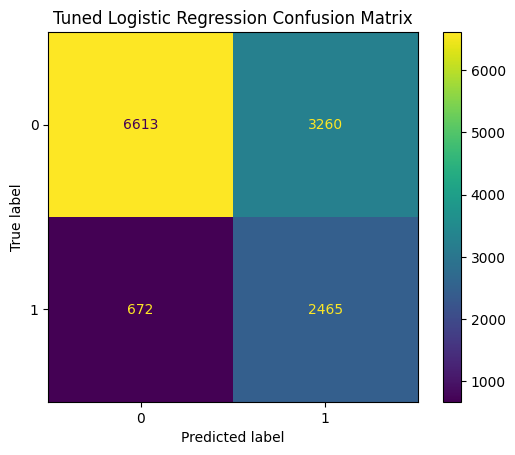

In [33]:
# 1. Define pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000, random_state=42))
])

# 2. Define param grid


param_grid = [
     {
        "model__solver": ["saga"],
        "model__penalty": ["elasticnet"],
        "model__C": [0.01, 0.1, 1],
        "model__class_weight": ["balanced", None],
        "model__l1_ratio": [0.0, 0.5, 1.0]  # Only used with elasticnet
    }
]

# 3. Initialize GridSearchCV
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="recall_macro",
    cv=3,
    n_jobs=-1,
    error_score="raise"
)

# 4. Fit GridSearch
grid.fit(X_train, y_train)

# 5. Best model
best_lr = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# 6. Predict
y_pred_tuned = best_lr.predict(X_test)

# 7. Evaluate
print("\n Tuned Logistic Regression classification Report")
print(classification_report(y_test, y_pred_tuned))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tuned)
plt.title("Tuned Logistic Regression Confusion Matrix")
plt.show()



# **Performance of the Tuned LogReg model**

**Best Parameters according to GridSearchCV**: {'model__C': 1, 'model__class_weight': 'balanced', 'model__l1_ratio': 0.5, 'model__penalty': 'elasticnet', 'model__solver': 'saga'}

**Accuracy** (**0.69**): Low accuracy. Lower than our baseline model, even.

**Recall** (**0.73**) vs **Precision (0.67)**: This model is better at accurately predicting that a true poor individual is poor (true positives). It is more aggressive at predicting the positive class. This is important in our use case because its imperative that as many poor people as possible are correctly identified and served. However, this increased aggression has also increased the number of false positives, negatively affecting our precision score.

On a general note, our tuned model has higher recall and precision scores than the baseline. This has also led to an improved **F1-score**. However, accuracy has reduced, likely due to increased false positives from our more aggressive positive-seeking model.


# **Model 3: Decision tree**

A Decision Tree is a non-parametric supervised ML technique utilised for both classification and regression tasks. It has a tree-like/ flowchart-like structure that starts with one main question called the root node which represents the entire dataset. From there, the tree branches out into different possibilities based on features in the data.

**Parts of the decision tree**

**Root Node:** Starting point representing the whole dataset.

**Branches**: Lines connecting nodes showing the flow from one decision to another.

**Internal Nodes**: Points where decisions are made based on data features.

**Leaf Nodes:** End points of the tree where the final decision or prediction is made.

**Why would this be a suitable model to use?**
1. Great interpretability for both technical and non-technical audiences.
2. Can easily handle mixed data types like in our dataset.
3. Doesn't need preprocessing in terms of scaling/normalising data.
4. Gives insight into feature importance which helps with feature selection.

**What are the drawbacks of this technique?**
1. Prone to overfitting. (Complexity, noise, training vs test data)
2. Small chanes in the training data can result in a very different decision tree being made. This makes it unstable.
3. Easily develops bias towards the majority class on imbalanced datasets. Our dataset is imbalanced.
4. Can be computationally expensive to train.
5. Can be biased towards features with a higher number of unique values resulting in a sub-optimal tree.
6. "Greedy" algorithm. It makes the most optimal choice locally which may not translate into the most globally optimal choice.

Fitting 3 folds for each of 72 candidates, totalling 216 fits
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      9873
           1       0.73      0.73      0.73      3137

    accuracy                           0.87     13010
   macro avg       0.82      0.82      0.82     13010
weighted avg       0.87      0.87      0.87     13010



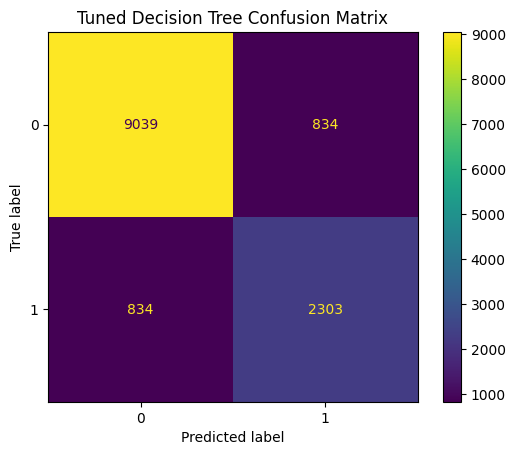

In [34]:
param_grid = {
    "model__max_depth": [3, 5, 10, None],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__criterion": ["gini", "entropy"]
}


grid_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier(random_state=42))
])


grid_search = GridSearchCV(
    estimator=grid_pipeline,  # model pipeline
    param_grid=param_grid,    # hyperparametrs
    cv=3,                     #3-folds
    scoring="recall_macro",  # Macro recall gives equal weight to both classes
    n_jobs=-1,
    verbose=1
)

#fit the grid_search object on the training data
grid_search.fit(X_train, y_train)

#use the best model found by GridSearchCV to generate predictions
y_pred_tuned = grid_search.predict(X_test)


#Model Evaluation
#Classification report
print(classification_report(y_test, y_pred_tuned))

# Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_tuned)).plot()
plt.title("Tuned Decision Tree Confusion Matrix")
plt.show()

# **Decision Tree Classifier performance**

1. **Accuracy:** 0.87 (87%): This is a generally high accuracy. However, accuracy can be misleading, especially when the classes are imbalanced as with our data.

2. **Precision vs Recall**: We have a strong and balanced precision, recall and F1 score (0.91) for the negative class (not poor). We have a lower but also majorly balanced precision (0.73), recall (0.73) and F1-score (0.73) for our positive class (poor). The model is better at accurately predicting the not poor vs the poor.

3. **Comparison of Averages**

    **Macro Avg (0.82):** The unweighted average of the metrics for both classes. The drop from the accuracy (0.87) to the macro average (0.82) highlights the performance gap between the two classes. Macro Avg is more insightful for imbalanced datasets like ours.

    **Weighted Avg (0.87)**: The average weighted by the number of samples in each class. Because the negative class has many more samples, this average is pulled much closer to its performance and matches the overall accuracy.

# **Model 4: Random Forest**

#### **What is Random Forest?**
Random Forest is an ensemble learning method that combines multiple decision trees to create a more robust and accurate classifier. It uses the principle of "wisdom of crowds" - many weak learners together make a strong learner.

#### **How Random Forest Works:**

1. **Bootstrap Sampling**: Create multiple random samples of the training data (with replacement)

2. **Random Feature Selection**: At each split in each tree, randomly select a subset of features to consider

3. **Build Multiple Trees**: Train many decision trees on different bootstrap samples with random feature subsets

4. **Voting Mechanism**: For classification, each tree votes for a class, and the majority vote determines the final prediction

5. **Averaging**: For regression, average the predictions of all trees

#### **Key Concepts:**
- **Bagging**: Bootstrap Aggregating - reduces overfitting by averaging multiple models
- **Feature Randomness**: Only considers random subset of features at each split
- **Out-of-Bag (OOB) Error**: Uses unused bootstrap samples for validation
- **n_estimators**: Number of trees in the forest
- **max_features**: Number of features to consider at each split

#### **Why would Random Forest be suitable?**

1. **Reduces Overfitting**: Ensemble approach prevents memorizing training data
2. **Handles Missing Values**: Can maintain accuracy even with missing data
3. **Feature Importance**: Provides clear ranking of feature importance
4. **Robust to Outliers**: Multiple trees reduce impact of anomalous data points
5. **Works with Mixed Data**: Handles both numerical and categorical features naturally
6. **No Feature Scaling Required**: Tree-based, so scaling not necessary
7. **Parallel Training**: Trees can be trained independently (fast on multi-core systems)
8. **Good Default Performance**: Often works well with minimal hyperparameter tuning
9. Has a good performance with large datasets.

#### **Why might Random forest be an unsuitable model?**
1. **Less Interpretable**: Harder to understand than single decision tree
2. **Memory Intensive**: Stores multiple trees, requiring more memory
3. **Overfitting with Noisy Data**: Can still overfit with very noisy datasets
4. **Biased Toward Categorical Variables**: Tends to favor features with more levels
5. **Prediction Speed**: Slower prediction than single tree (must query all trees)
6. **Limited Extrapolation**: Cannot predict beyond the range of training data


Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      9873
           1       0.89      0.66      0.76      3137

    accuracy                           0.90     13010
   macro avg       0.89      0.82      0.85     13010
weighted avg       0.90      0.90      0.89     13010



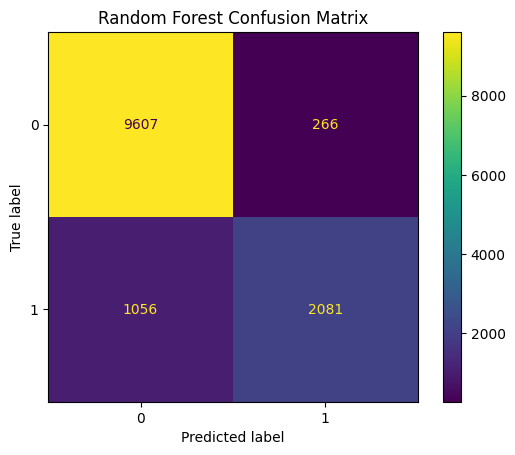

In [35]:
# Full pipeline with Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Predict
y_pred = rf_pipeline.predict(X_test)

# Evaluate the model
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf_pipeline, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

# **Performance of Random Forest**

**Accuracy:** Has high accuracy of 90%

**Precision vs Recall:** Higher precision for the negative (majority) class (0.91) than positive (minority) class (0.89) but both generally very good. Model seems slightly more conservative about labeling a prediction positive (poor) because precision (0.89) was better than recall (0.82). Some true positives (truly poor) can be missed due to this.

**Comparison of Averages**

  **Macro Avg (0.85):** Quite a good score.

  **Weighted Avg (0.90)**: Because the negative class has many more samples, this average is pulled much closer to its performance and matches the overall accuracy.

# **Comparison of the model performances**

In [36]:
from sklearn.metrics import precision_score, f1_score

# Collect performance metrics for each model
results = {
    "Logistic Regression (Baseline)": {
        "Accuracy": lr_baseline.score(X_test, y_test),
        "Recall (Macro)": recall_score(y_test, y_pred_base, average='macro'),
        "Precision (Macro)": precision_score(y_test, y_pred_base, average='macro'),
        "F1-Score (Macro)": f1_score(y_test, y_pred_base, average='macro')
    },
    "Logistic Regression (Tuned)": {
        "Accuracy": best_lr.score(X_test, y_test),
        "Recall (Macro)": recall_score(y_test, y_pred_tuned, average='macro'),
        "Precision (Macro)": precision_score(y_test, y_pred_tuned, average='macro'),
        "F1-Score (Macro)": f1_score(y_test, y_pred_tuned, average='macro')
    },
     "Decision Tree (Tuned)": {
        "Accuracy": grid_search.score(X_test, y_test),
        "Recall (Macro)": recall_score(y_test, y_pred_tuned, average='macro'),
        "Precision (Macro)": precision_score(y_test, y_pred_tuned, average='macro'),
        "F1-Score (Macro)": f1_score(y_test, y_pred_tuned, average='macro')
    },
    "Random Forest": {
        "Accuracy": rf_pipeline.score(X_test, y_test),
        "Recall (Macro)": recall_score(y_test, y_pred, average='macro'),
        "Precision (Macro)": precision_score(y_test, y_pred, average='macro'),
        "F1-Score (Macro)": f1_score(y_test, y_pred, average='macro')
    }
}

summary_df = pd.DataFrame(results).T
print("\n Model Comparison Table:")
display(summary_df)


 Model Comparison Table:


,Accuracy,Recall (Macro),Precision (Macro),F1-Score (Macro)
Logistic Regression (Baseline),0.784858,0.617706,0.709696,0.633482
Logistic Regression (Tuned),0.697771,0.824834,0.824834,0.824834
Decision Tree (Tuned),0.824834,0.824834,0.824834,0.824834
Random Forest,0.898386,0.818215,0.893815,0.847280


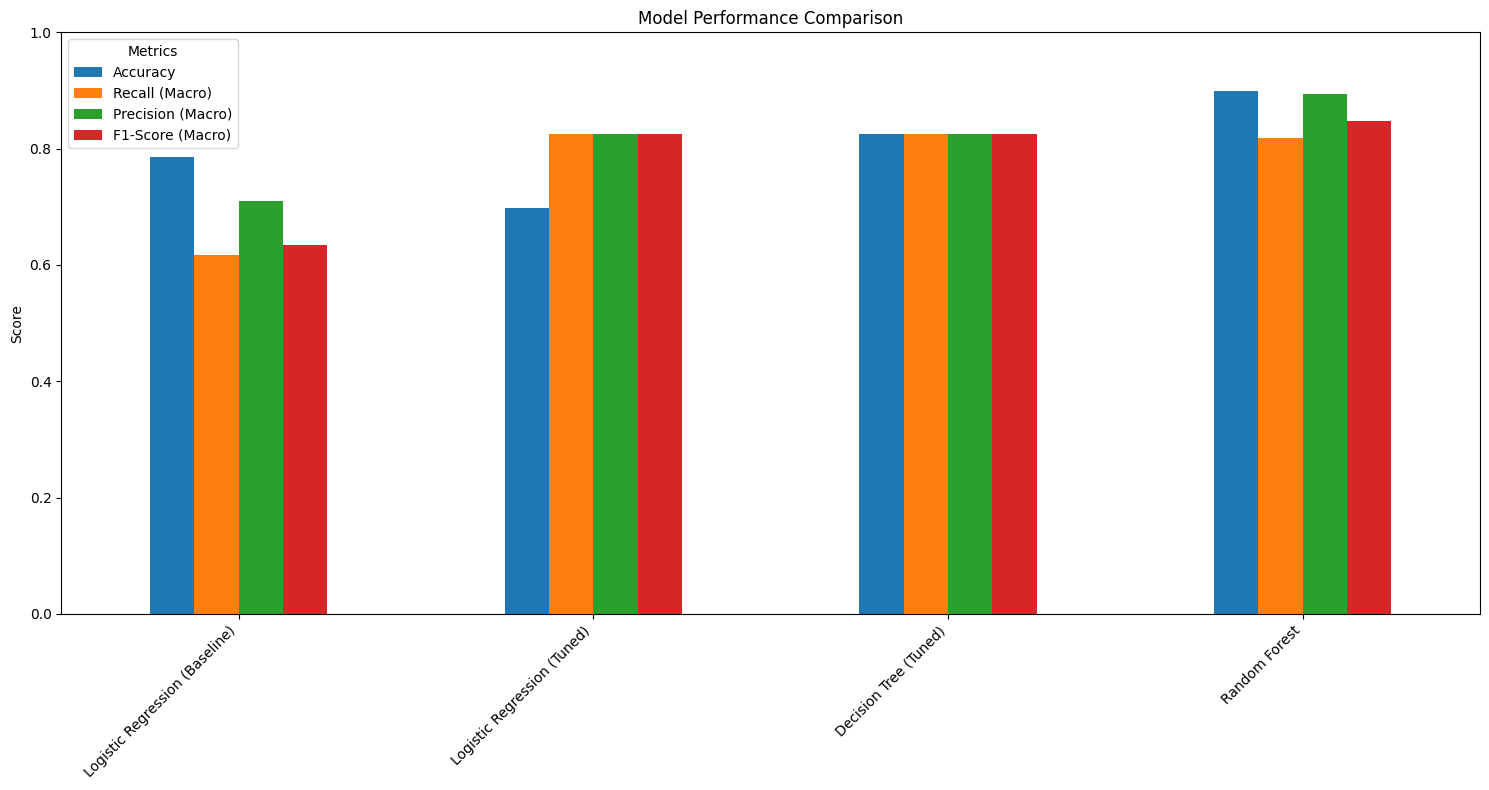

In [37]:
# Visualization of model performance comparison
summary_df.plot(kind='bar', figsize=(15, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

**Ranking comparative model performance from best to worst**

1. Random forest classifier
2. Decision Tree (DT) classifier
3. Tuned logistic regression model
4. Baseline Logistic regression model

**Overall Comparisons**:
Random Forest was the best performing model with the highest recall, precision, F1 and accuracy scores.

The DT and tuned LogReg models have identical, very high macro recall+precision scores (~0.82). However, their accuracy is drastically lower (0.69 and 0.82 respectively) than the Random Forest's (0.90).

This difference suggests that the tuned LogReg and Decision Tree likely sacrificed performance on the majority class to boost performance on the minority class. This is a common outcome when using techniques like class_weight='balanced'.

The Random Forest had a high performance on the minority class without sacrificing performance on the majority class.

The Decision tree outcompetes the tuned LogReg model when it comes to overall accuracy.

The baseline LogReg is the poorest performer of all and highlights the importance of hyperparameter tuning.

#NN with selected features used for Classical ML models

In [ ]:
# Apply transformations manually - scaling, encoding and missing values
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [ ]:
#Defining the neural network
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train_transformed.shape[1]
input_shape

181

In [ ]:
!pip install -U keras-tuner

In [ ]:
import kerastuner
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout

LOG_DIR = f"{int(time.time())}"

In [ ]:


def build_model(hp):
    model2 = keras.models.Sequential()

    #input layer
    model2.add(Dense(units = hp.Int('inputUnits', min_value=15, max_value=200), kernel_initializer = 'uniform', activation = 'relu', input_dim = input_shape))

    #add one or more hiden layers
    for i in range(hp.Int("numLayers", min_value=1, max_value=4)):
      model2.add(Dense(units = hp.Int('inputUnits', min_value=15, max_value=200), kernel_initializer = 'uniform', activation = 'relu'))

      #dropout layer after each hiden layer
      model2.add(Dropout(rate=hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1)))

    #output layer
    model2.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

    #configure the model for the training process
    model2.compile(
      optimizer = tf.keras.optimizers.Adam(hp.Choice('learnRate', [0.01,0.001,0.02,0.001])),
      loss = 'binary_crossentropy',
      metrics = ['accuracy']
    )

    return model2



In [ ]:

#sets up a random search process using Keras Tuner to find the best hyperparameters for the nn
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials = 3,
    executions_per_trial = 3,
    directory = LOG_DIR
)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:


tuner.search(
    x = X_train_transformed,
    y = y_train,
    epochs = 10,
    batch_size=32,
    validation_data = (X_test_transformed, y_test)
)



Trial 3 Complete [00h 05m 58s]
val_accuracy: 0.8812451958656311

Best val_accuracy So Far: 0.8812451958656311
Total elapsed time: 00h 14m 52s


In [ ]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]


In [ ]:
best_model = tuner.hypermodel.build(best_hp)

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath="best_MPI_model1.keras",   # file to save model
    monitor="val_accuracy",             # monitor validation accuracy
    mode="max",                         # maximize AUC
    save_best_only=True,                # only save when val_auc improves
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_accuracy',    # monitor validation accuracy
    patience=5,           # wait 5 epochs before stopping
    mode='max',           # maximize AUC
    restore_best_weights=True

)

history = best_model.fit(X_train_transformed, y_train,
                         epochs=10,
                         validation_data=(X_test_transformed, y_test),
                         callbacks=[early_stop, checkpoint])

Epoch 1/10
1621/1627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7828 - loss: 0.4530
Epoch 1: val_accuracy improved from -inf to 0.79992, saving model to best_MPI_model1.keras
1627/1627 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7829 - loss: 0.4529 - val_accuracy: 0.7999 - val_loss: 0.3986
Epoch 2/10
1623/1627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8047 - loss: 0.3981
Epoch 2: val_accuracy improved from 0.79992 to 0.80892, saving model to best_MPI_model1.keras
1627/1627 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8047 - loss: 0.3981 - val_accuracy: 0.8089 - val_loss: 0.3830
Epoch 3/10
1616/1627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8196 - loss: 0.3717
Epoch 3: val_accuracy improved from 0.80892 to 0.81084, saving model to best_MPI_model1.keras
1627/1627 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8196 - loss: 0.3717 - val_accuracy: 0.8108 - val_loss: 0.3836
Epoch 4/10
1622/1627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8325 - loss: 0.3510
Epoch 4: v

In [ ]:
tuner.get_best_models()[0].summary()

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 175)            │        31,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 175)            │        30,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 175)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 175)            │        30,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 175)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 175)            │        30,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 175)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           176 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,426 (486.04 KB)

 Trainable params: 124,426 (486.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Save final trained model (optional)
best_model.save("/content/drive/MyDrive/NN_MPI_model1.keras")

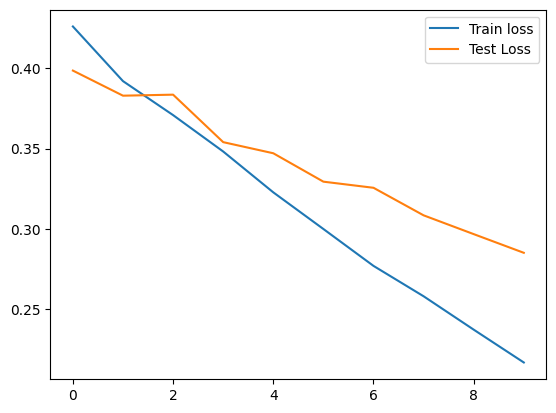

In [ ]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss') #training set
plt.plot(history.history['val_loss'], label='Test Loss') #testing set
plt.legend();

407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


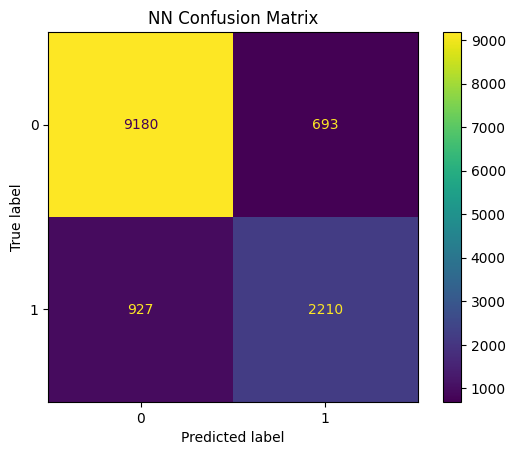

In [ ]:
# Predicting the Test set results
y_pred = best_model.predict(X_test_transformed)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title(f"NN Confusion Matrix")
plt.show()

In [ ]:
# Classification Report
print(f"NN Classification Report")
print(classification_report(y_test, y_pred))

NN Classification Report
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      9873
           1       0.76      0.70      0.73      3137

    accuracy                           0.88     13010
   macro avg       0.83      0.82      0.83     13010
weighted avg       0.87      0.88      0.87     13010



#-----------------------------------

#NN with more features than those used for classical ML

In [ ]:
'''
#clear task df dataset
del df

import gc
gc.collect()
'''

'\n#clear task df dataset\ndel df\n\nimport gc\ngc.collect()\n'

In [ ]:
csv_file2 = "/content/drive/MyDrive/NNpovdata_clean_after.csv"

df2 = pd.read_csv(csv_file2)
df2

/tmp/ipython-input-1973192329.py:3: DtypeWarning: Columns (51,53,58,94,95,118,122,125,127,129,131,140,144,171,184,187,189) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(csv_file2)


,hhid,pid,M0,E00,E02,E03,E04,E04b,E04_1,E05,...,HA0318,HA0319,HA0320,HA0321,HA0322,HA0323,HA0331,HA0332,HA0399,HA03211
0,100001,1,NaN,1.0,Unable to read and write,Never attended,Disabled,NaN,No,NaN,...,"Yes,jointly with hh member",No,No,No,No,No,No,"Yes,jointly with hh member",No,"Yes,jointly with hh member"
1,100001,2,NaN,1.0,Unable to read and write,Never attended,Disabled,NaN,No,NaN,...,"Yes,jointly with hh member",No,No,No,No,No,No,"Yes,jointly with hh member",No,"Yes,jointly with hh member"
2,100001,3,NaN,1.0,Unable to read and write,Never attended,Had to help at home,NaN,No,NaN,...,"Yes,jointly with hh member",No,No,No,No,No,No,"Yes,jointly with hh member",No,"Yes,jointly with hh member"
3,100002,1,NaN,1.0,Able to read and write,Attended school in the past,NaN,NaN,NaN,Completed P.7,...,"Yes,individually",No,No,No,No,No,No,"Yes,individually",No,No
4,100002,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Yes,individually",No,No,No,No,No,No,"Yes,individually",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65072,99904,1,0.466221,1.0,Unable to read and write,Attended school in the past,NaN,NaN,NaN,Completed P.3,...,No,No,No,No,No,No,No,No,No,No
65073,99904,2,0.466221,2.0,Unable to read and write,Never attended,Had to help at home,NaN,No,NaN,...,No,No,No,No,No,No,No,No,No,No
65074,99904,4,0.466221,2.0,Unable to read and write,Never attended,Too expensive,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,No,No
65075,99904,5,0.466221,1.0,Unable to read and write,Never attended,Too expensive,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,No,No


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65077 entries, 0 to 65076
Columns: 217 entries, hhid to HA03211
dtypes: float64(102), int64(2), object(113)
memory usage: 107.7+ MB


In [ ]:
print(df2.columns.tolist())

['hhid', 'pid', 'M0', 'E00', 'E02', 'E03', 'E04', 'E04b', 'E04_1', 'E05', 'E06', 'E09', 'E09b', 'HE00', 'HE22', 'HE23', 'HE23_1', 'HE24', 'HE02', 'HE03', 'HE04', 'HE05', 'HE06__1', 'HE06__2', 'HE06__3', 'HE06__4', 'HE06__5', 'HE06__6', 'HE06__7', 'HE06__8', 'HE06__9', 'HE06__10', 'HE06__11', 'HE06__12', 'HE06__13', 'HE06__14', 'HE06__15', 'HE06__16', 'HE06__17', 'HE06__20', 'HE06__21', 'HE06__22', 'HE06__23', 'HE06__24', 'HE06__25', 'HE06__26', 'HE06__27', 'HE06__96', 'HE06b', 'HE07', 'HE08', 'HE08b', 'HE09', 'HE09b', 'HE34', 'HE35', 'HE10', 'HE25', 'HE25b', 'HE11', 'HE36', 'HE37', 'HE37_oth', 'HE14', 'HE15', 'HE16', 'HE17a', 'HE17b', 'HE17c', 'HE17d', 'HE17e', 'HE17f', 'HE17f_1', 'HE17g', 'HE18', 'HE38', 'HE39a', 'HE39b', 'HE39c', 'HE39d', 'HE39e', 'HE39f', 'HE39g', 'HE39h', 'HE19', 'HE29__1', 'HE29__2', 'HE29__3', 'HE29__4', 'HE29__5', 'HE29__6', 'HE29__7', 'HE29__8', 'HE29__96', 'HE29b', 'HE29bc', 'HE30', 'HE20', 'HE26', 'HE27', 'HE28', 'HE31', 'HE32', 'HE33', 'HE21__1', 'HE21__2', 

In [ ]:
# Check duplicates
print('duplicated rows', df2.duplicated().sum())

duplicated rows 32


In [ ]:
# View duplicates
df2[df2.duplicated()]

,hhid,pid,M0,E00,E02,E03,E04,E04b,E04_1,E05,...,HA0318,HA0319,HA0320,HA0321,HA0322,HA0323,HA0331,HA0332,HA0399,HA03211
3676,11105,1,0.466221,1.0,Able to read and write,Attended school in the past,NaN,NaN,NaN,Completed P.4,...,NaN,No,NaN,No,NaN,NaN,NaN,NaN,No,NaN
3677,11105,1,0.466221,1.0,Able to read and write,Attended school in the past,NaN,NaN,NaN,Completed P.4,...,No,NaN,No,NaN,No,No,"Yes,individually",No,NaN,No
3678,11105,1,0.466221,1.0,Able to read and write,Attended school in the past,NaN,NaN,NaN,Completed post primary/junior specialized trai...,...,NaN,No,NaN,No,NaN,NaN,NaN,NaN,No,NaN
3679,11105,1,0.466221,1.0,Able to read and write,Attended school in the past,NaN,NaN,NaN,Completed post primary/junior specialized trai...,...,No,NaN,No,NaN,No,No,"Yes,individually",No,NaN,No
3682,11105,2,0.466221,1.0,Able to read and write,Currently attending school,NaN,NaN,NaN,NaN,...,NaN,No,NaN,No,NaN,NaN,NaN,NaN,No,NaN
3683,11105,2,0.466221,1.0,Able to read and write,Currently attending school,NaN,NaN,NaN,NaN,...,No,NaN,No,NaN,No,No,"Yes,individually",No,NaN,No
3684,11105,2,0.466221,1.0,Able to read and write,Currently attending school,NaN,NaN,NaN,NaN,...,NaN,No,NaN,No,NaN,NaN,NaN,NaN,No,NaN
3685,11105,2,0.466221,1.0,Able to read and write,Currently attending school,NaN,NaN,NaN,NaN,...,No,NaN,No,NaN,No,No,"Yes,individually",No,NaN,No
3686,11105,2,0.466221,1.0,Able to read and write,Currently attending school,NaN,NaN,NaN,NaN,...,NaN,No,NaN,No,NaN,NaN,NaN,NaN,No,NaN
3687,11105,2,0.466221,1.0,Able to read and write,Currently attending school,NaN,NaN,NaN,NaN,...,No,NaN,No,NaN,No,No,"Yes,individually",No,NaN,No


In [ ]:
df2.drop_duplicates(inplace=True)

In [ ]:
df2.duplicated().sum()

np.int64(0)

In [ ]:
df2.drop(columns=["hhid","pid"] , inplace=True)

In [ ]:
#Target variable - replacing missing values with 0 and those with M0 value with 1.
df2["M0"] = df2["M0"].notnull().astype(int)

In [ ]:
#check correlation
# Upper triangle mask (avoid duplicates)
corr_matrix = df2.corr(numeric_only=True).abs()
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Find features above threshold (e.g., >0.85)
high_corr = [
    (col, row, upper.loc[row, col])
    for col in upper.columns
    for row in upper.index
    if not pd.isnull(upper.loc[row, col]) and upper.loc[row, col] > 0.85
]

pd.DataFrame(high_corr, columns=["Feature1", "Feature2", "Correlation"])

,Feature1,Feature2,Correlation
0,HE16,HE04,0.861627
1,HE17g,HE17f_1,0.990591
2,HE33,HE39d,0.958187
3,hsize,equiv,0.972298
4,digital_reg_financial,access_financial_account_any,0.974352
5,HC11__2,HC11__1,0.862546


In [ ]:
x_vars = ["HE16", "HE17g", "HE33", "hsize", "digital_reg_financial", "HC11__2", "HE04", "HE17f_1", "HE39d", "equiv", "access_financial_account_any", "HC11__1"  ]
y = "M0"

correlations = {}

for col in x_vars:
    correlations[col] = df2[col].corr(df2[y])

# Convert to DataFrame for better readability
corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation with y'])
print(corr_df.sort_values(by='Correlation with y', ascending=False))

                              Correlation with y
hsize                                   0.203823
equiv                                   0.185904
HC11__1                                 0.011862
HC11__2                                 0.006029
HE17g                                  -0.013394
digital_reg_financial                  -0.026510
access_financial_account_any           -0.027249
HE16                                   -0.036124
HE39d                                  -0.040450
HE17f_1                                -0.042691
HE04                                   -0.052331
HE33                                   -0.116732


In [ ]:
#drop those with least corr with targer
df2.drop(columns=["equiv", "HC11__2","HE17f_1", "access_financial_account_any", "HE04", "HE33"], inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65045 entries, 0 to 65076
Columns: 209 entries, M0 to HA03211
dtypes: float64(95), int64(1), object(113)
memory usage: 104.2+ MB


In [ ]:

X = df2.drop("M0", axis=1)  #
y = df2["M0"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Get the list of numeric column names
int_col=X_train.select_dtypes('integer').columns
print(int_col)

float_col = X_train.select_dtypes('float').columns
print(float_col)
#with the 'number' value we are returning all numeric columns- integer columns and float
num_cols=X_train.select_dtypes('number').columns
num_cols

Index([], dtype='object')
Index(['E00', 'E06', 'HE00', 'HE03', 'HE05', 'HE06__1', 'HE06__2', 'HE06__3',
       'HE06__4', 'HE06__5', 'HE06__6', 'HE06__7', 'HE06__8', 'HE06__9',
       'HE06__10', 'HE06__11', 'HE06__12', 'HE06__13', 'HE06__14', 'HE06__15',
       'HE06__16', 'HE06__17', 'HE06__20', 'HE06__21', 'HE06__22', 'HE06__23',
       'HE06__24', 'HE06__25', 'HE06__26', 'HE06__27', 'HE06__96', 'HE35',
       'HE36', 'HE15', 'HE16', 'HE17a', 'HE17b', 'HE17c', 'HE17d', 'HE17e',
       'HE17f', 'HE17g', 'HE39a', 'HE39b', 'HE39c', 'HE39d', 'HE39e', 'HE39f',
       'HE39g', 'HE39h', 'HE29__1', 'HE29__2', 'HE29__3', 'HE29__4', 'HE29__5',
       'HE29__6', 'HE29__7', 'HE29__8', 'HE29__96', 'HE20', 'HE28', 'HE21__1',
       'HE21__2', 'HE21__3', 'HE21__5', 'HE21__4', 'age', 'hsize',
       'employment', 'digital_reg_financial', 'HC01_1', 'HC03', 'HC08a',
       'HC08b', 'HC11__0', 'HC11__1', 'HC13', 'HC13_1', 'HC16', 'HC18_4',
       'HC18_5', 'HC18_6', 'HC19a__3', 'HC19a__6', 'HC19a__4',

Index(['E00', 'E06', 'HE00', 'HE03', 'HE05', 'HE06__1', 'HE06__2', 'HE06__3',
       'HE06__4', 'HE06__5', 'HE06__6', 'HE06__7', 'HE06__8', 'HE06__9',
       'HE06__10', 'HE06__11', 'HE06__12', 'HE06__13', 'HE06__14', 'HE06__15',
       'HE06__16', 'HE06__17', 'HE06__20', 'HE06__21', 'HE06__22', 'HE06__23',
       'HE06__24', 'HE06__25', 'HE06__26', 'HE06__27', 'HE06__96', 'HE35',
       'HE36', 'HE15', 'HE16', 'HE17a', 'HE17b', 'HE17c', 'HE17d', 'HE17e',
       'HE17f', 'HE17g', 'HE39a', 'HE39b', 'HE39c', 'HE39d', 'HE39e', 'HE39f',
       'HE39g', 'HE39h', 'HE29__1', 'HE29__2', 'HE29__3', 'HE29__4', 'HE29__5',
       'HE29__6', 'HE29__7', 'HE29__8', 'HE29__96', 'HE20', 'HE28', 'HE21__1',
       'HE21__2', 'HE21__3', 'HE21__5', 'HE21__4', 'age', 'hsize',
       'employment', 'digital_reg_financial', 'HC01_1', 'HC03', 'HC08a',
       'HC08b', 'HC11__0', 'HC11__1', 'HC13', 'HC13_1', 'HC16', 'HC18_4',
       'HC18_5', 'HC18_6', 'HC19a__3', 'HC19a__6', 'HC19a__4', 'HC19a__5',
       'HC19a

In [ ]:
# Get the list of string column names
cat_cols= X_train.select_dtypes('object').columns
cat_cols

Index(['E02', 'E03', 'E04', 'E04b', 'E04_1', 'E05', 'E09', 'E09b', 'HE22',
       'HE23',
       ...
       'HA0318', 'HA0319', 'HA0320', 'HA0321', 'HA0322', 'HA0323', 'HA0331',
       'HA0332', 'HA0399', 'HA03211'],
      dtype='object', length=113)

In [ ]:
#Detect skewness on numeric train only
skewness = X_train[num_cols].skew().abs()  # absolute skew
skew_threshold = 0.75  # common rule-of-thumb

num_median_cols = skewness[skewness > skew_threshold].index.tolist()   # skewed -> median
num_mean_cols   = skewness[skewness <= skew_threshold].index.tolist()  # approx normal -> mean

print("Mean-impute numeric cols:", num_mean_cols)
print("Median-impute numeric cols:", num_median_cols)

Mean-impute numeric cols: ['HE06__6', 'HE29__1', 'HC19a__3']
Median-impute numeric cols: ['E00', 'E06', 'HE00', 'HE03', 'HE05', 'HE06__1', 'HE06__2', 'HE06__3', 'HE06__4', 'HE06__5', 'HE06__7', 'HE06__8', 'HE06__9', 'HE06__10', 'HE06__11', 'HE06__12', 'HE06__13', 'HE06__14', 'HE06__15', 'HE06__16', 'HE06__17', 'HE06__20', 'HE06__21', 'HE06__22', 'HE06__23', 'HE06__24', 'HE06__25', 'HE06__26', 'HE06__27', 'HE06__96', 'HE35', 'HE36', 'HE15', 'HE16', 'HE17a', 'HE17b', 'HE17c', 'HE17d', 'HE17e', 'HE17f', 'HE17g', 'HE39a', 'HE39b', 'HE39c', 'HE39d', 'HE39e', 'HE39f', 'HE39g', 'HE39h', 'HE29__2', 'HE29__3', 'HE29__4', 'HE29__5', 'HE29__6', 'HE29__7', 'HE29__8', 'HE29__96', 'HE20', 'HE28', 'HE21__1', 'HE21__2', 'HE21__3', 'HE21__5', 'HE21__4', 'age', 'hsize', 'employment', 'digital_reg_financial', 'HC01_1', 'HC03', 'HC08a', 'HC08b', 'HC11__0', 'HC11__1', 'HC13', 'HC13_1', 'HC16', 'HC18_4', 'HC18_5', 'HC18_6', 'HC19a__6', 'HC19a__4', 'HC19a__5', 'HC19a__7', 'HC19b', 'HC19bb', 'HC19d', 'HC21a',

In [ ]:
# column splits
mean_cols = ['HE06__6', 'HE29__1', 'HC19a__3']
median_cols = ['E00', 'E06', 'HE00', 'HE03', 'HE05', 'HE06__1', 'HE06__2', 'HE06__3', 'HE06__4', 'HE06__5', 'HE06__7', 'HE06__8', 'HE06__9', 'HE06__10', 'HE06__11', 'HE06__12', 'HE06__13', 'HE06__14', 'HE06__15', 'HE06__16', 'HE06__17', 'HE06__20', 'HE06__21', 'HE06__22', 'HE06__23', 'HE06__24', 'HE06__25', 'HE06__26', 'HE06__27', 'HE06__96', 'HE35', 'HE36', 'HE15', 'HE16', 'HE17a', 'HE17b', 'HE17c', 'HE17d', 'HE17e', 'HE17f', 'HE17g', 'HE39a', 'HE39b', 'HE39c', 'HE39d', 'HE39e', 'HE39f', 'HE39g', 'HE39h', 'HE29__2', 'HE29__3', 'HE29__4', 'HE29__5', 'HE29__6', 'HE29__7', 'HE29__8', 'HE29__96', 'HE20', 'HE28', 'HE21__1', 'HE21__2', 'HE21__3', 'HE21__5', 'HE21__4', 'age', 'hsize', 'employment', 'digital_reg_financial', 'HC01_1', 'HC03', 'HC08a', 'HC08b', 'HC11__0', 'HC11__1', 'HC13', 'HC13_1', 'HC16', 'HC18_4', 'HC18_5', 'HC18_6', 'HC19a__6', 'HC19a__4', 'HC19a__5', 'HC19a__7', 'HC19b', 'HC19bb', 'HC19d', 'HC21a', 'HC21b', 'HC24__0', 'HC24__1', 'HC24__2'] # numeric (median impute)

# Transformers
mean_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', StandardScaler())
])

median_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy="constant", fill_value="MISSING")),
    ('encoder', OneHotEncoder(handle_unknown="ignore"))
])

# Preprocessor
preprocessor = ColumnTransformer([
    ('mean_num', mean_transformer, mean_cols),
    ('median_num', median_transformer, median_cols),
    ('cat', cat_transformer, cat_cols)
])



In [ ]:
!pip install -U keras-tuner

In [ ]:
import kerastuner
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense

LOG_DIR = f"{int(time.time())}"

In [ ]:
# Apply transformations manually - scaling, encoding and missing values
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [ ]:
#Defining the neural network
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train_transformed.shape[1]
input_shape

3253

In [ ]:

# use Keras Tuner to find the best hyperparameters for the neural network.

def build_model(hp):
    model3 = keras.models.Sequential() # Define model type - Instantiate Sequential model object

    model3.add(Dense(units = hp.Int('inputUnits', min_value=100, max_value=300), kernel_initializer = 'uniform', activation = 'relu', input_dim = input_shape)) # Input layer

    for i in range(hp.Int("numLayers", min_value=1, max_value=4)):
      model3.add(Dense(units = hp.Int('inputUnits', min_value=100, max_value=300), kernel_initializer = 'uniform', activation = 'relu'))

    #dropout
    model3.add(Dropout(rate=hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1)))

    model3.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

    model3.compile(
      optimizer = tf.keras.optimizers.Adam(hp.Choice('learnRate', [0.01,0.001,0.02,0.001])),
      loss = 'binary_crossentropy',
      metrics = ['accuracy']
    )

    return model3



In [ ]:


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials = 3,
    executions_per_trial = 3,
    directory = LOG_DIR
)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:


tuner.search(
    x = X_train_transformed,
    y = y_train,
    epochs = 10,
    batch_size=32,
    validation_data = (X_test_transformed, y_test)
)



Trial 3 Complete [00h 12m 11s]
val_accuracy: 0.9030158519744873

Best val_accuracy So Far: 0.9030158519744873
Total elapsed time: 00h 37m 27s


In [ ]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]


In [ ]:
best_model = tuner.hypermodel.build(best_hp)

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath="best_MPI_model2.keras",   # file to save model
    monitor="val_accuracy",             # monitor validation accuracy
    mode="max",                         # maximize AUC
    save_best_only=True,                # only save when val_auc improves
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_accuracy',    # monitor validation accuracy
    patience=5,           # wait 5 epochs before stopping
    mode='max',           # maximize AUC
    restore_best_weights=True

)

history = best_model.fit(X_train_transformed, y_train,
                         epochs=10,
                         validation_data=(X_test_transformed, y_test),
                         callbacks=[early_stop, checkpoint])

Epoch 1/10
1625/1627 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7782 - loss: 0.4657
Epoch 1: val_accuracy improved from -inf to 0.80137, saving model to best_MPI_model2.keras
1627/1627 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.7782 - loss: 0.4657 - val_accuracy: 0.8014 - val_loss: 0.4109
Epoch 2/10
1625/1627 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8087 - loss: 0.3920
Epoch 2: val_accuracy improved from 0.80137 to 0.82297, saving model to best_MPI_model2.keras
1627/1627 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8087 - loss: 0.3920 - val_accuracy: 0.8230 - val_loss: 0.3787
Epoch 3/10
1627/1627 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8324 - loss: 0.3520
Epoch 3: val_accuracy improved from 0.82297 to 0.82797, saving model to best_MPI_model2.keras
1627/1627 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.8324 - loss: 0.3520 - val_accuracy: 0.8280 - val_loss: 0.3673
Epoch 4/10
1627/1627 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8519 - loss: 0.3177
Ep

In [ ]:
tuner.get_best_models()[0].summary()

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 160)            │       520,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 160)            │        25,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 160)            │        25,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 160)            │        25,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 160)            │        25,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 623,841 (2.38 MB)

 Trainable params: 623,841 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Save final trained model (optional)
best_model.save("NN_MPI_model2.keras")

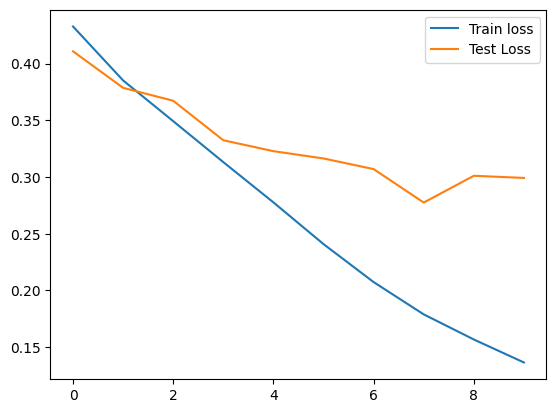

In [ ]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss') #training set
plt.plot(history.history['val_loss'], label='Test Loss') #testing set
plt.legend();

407/407 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


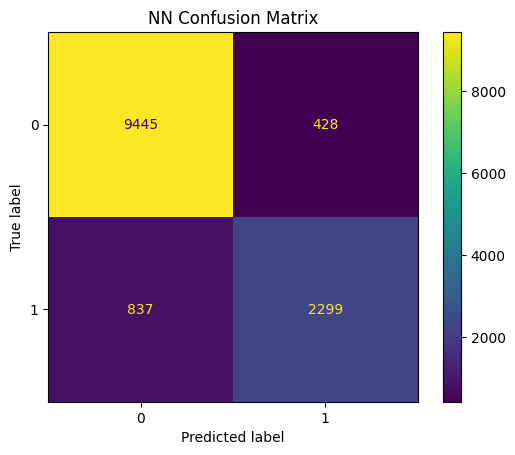

In [ ]:
# Predicting the Test set results
y_pred = best_model.predict(X_test_transformed)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title(f"NN Confusion Matrix")
plt.show()

In [ ]:
# Classification Report
print(f"NN Classification Report")
print(classification_report(y_test, y_pred))

NN Classification Report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      9873
           1       0.84      0.73      0.78      3136

    accuracy                           0.90     13009
   macro avg       0.88      0.84      0.86     13009
weighted avg       0.90      0.90      0.90     13009

